In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

%matplotlib inline
sns.set(style="whitegrid")

In [8]:
# Read all HTML tables on the page
url = 'https://en.wikipedia.org/wiki/List_of_highest-grossing_films'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}
film = requests.get(url, headers=headers)
tables = pd.read_html(StringIO(film.text))

# The first table is usually the main one
df = tables[0]

print("Raw data preview:")
display(df.head())
print("\nData info:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nDuplicates:")
print(df.duplicated().sum())

Raw data preview:


,Rank,Peak,Title,Worldwide gross,Year,Ref
0,1,1,Avatar,"$2,923,710,708",2009,[# 1][# 2]
1,2,1,Avengers: Endgame,"$2,797,501,328",2019,[# 3][# 4]
2,3,3,Avatar: The Way of Water,"$2,343,096,253",2022,[# 5][# 6]
3,4,1,Titanic,"T$2,257,906,828",1997,[# 7][# 8]
4,5,5,Ne Zha 2,"$2,215,690,000",2025,[# 9][# 10]



Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             50 non-null     int64 
 1   Peak             50 non-null     object
 2   Title            50 non-null     object
 3   Worldwide gross  50 non-null     object
 4   Year             50 non-null     int64 
 5   Ref              50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB
None

Missing values per column:
Rank               0
Peak               0
Title              0
Worldwide gross    0
Year               0
Ref                0
dtype: int64

Duplicates:
0


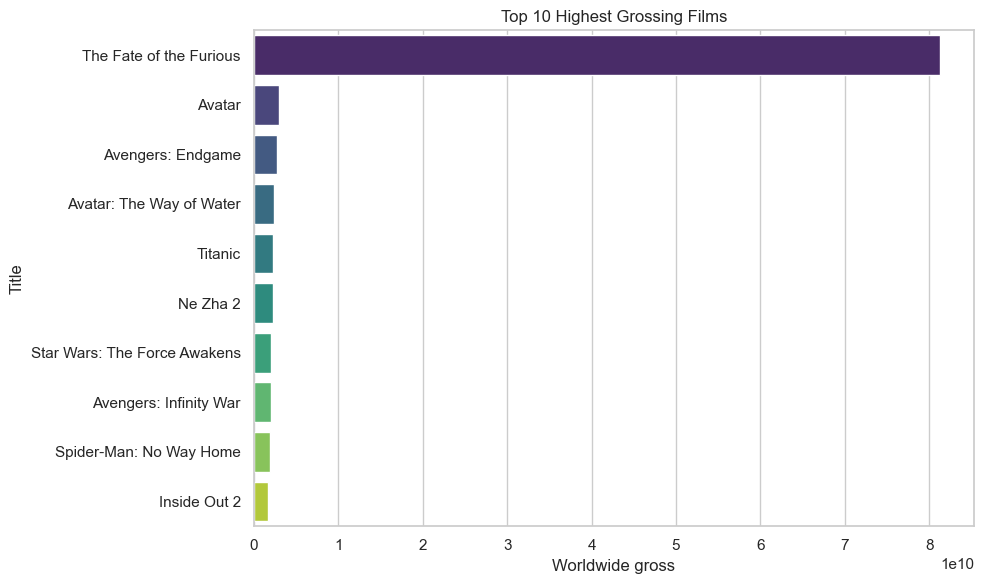

In [19]:
# Clean year column
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Basic summaries
#df['Worldwide gross'] = df['Worldwide gross'].str.replace(r'[^0-9.]', '', regex=True).astype(float)
top10 = df.nlargest(10, 'Worldwide gross')

# Top 10 Highest Grossing Films (Bar Chart)
plt.figure(figsize=(10,6))
sns.barplot(x='Worldwide gross', y='Title', data=top10, hue='Title', palette='viridis')
plt.title("Top 10 Highest Grossing Films")
plt.tight_layout()
plt.savefig('top_10.png')
plt.show()